# Binary Classification on raisin dataset
## Table of Contents
* [Basic Stats](#basic_stats)
* [Feature Correlations](#feature_corr)
* [Feature Distributions by Class](#features_by_class)
* [Dimensionality Reduction - PCA](#PCA)
* [Random Forest Model](#RF)

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Machine Learning
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# import data
df = pd.read_excel('../input/raisin-dataset/Raisin_Dataset.xlsx', sheet_name='Raisin_Grains_Dataset')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


<a id='basic_stats'></a>
# Basic Stats

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [4]:
# target
df.Class.value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

#### Target is perfectly balanced.

In [5]:
# basic stats for numerical features
features_num = ['Area', 'MajorAxisLength', 'MinorAxisLength', 
                'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

df[features_num].describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


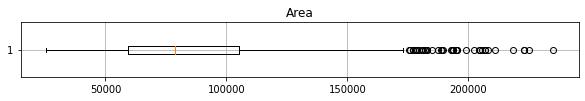

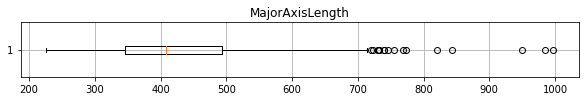

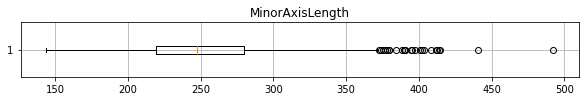

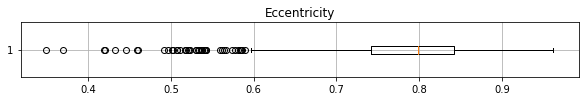

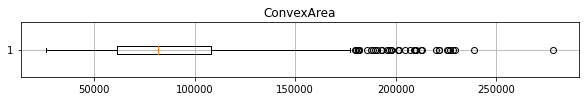

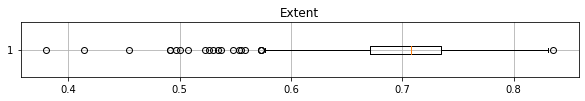

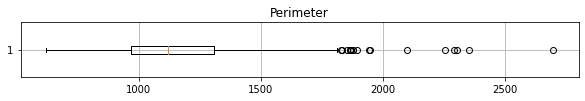

In [6]:
# boxplots of all features
for f in features_num:
    plt.figure(figsize=(10,1))
    plt.boxplot(x=df[f], vert=False)
    plt.title(f)
    plt.grid()
    plt.show()

<a id='feature_corr'></a>
# Feature Correlations

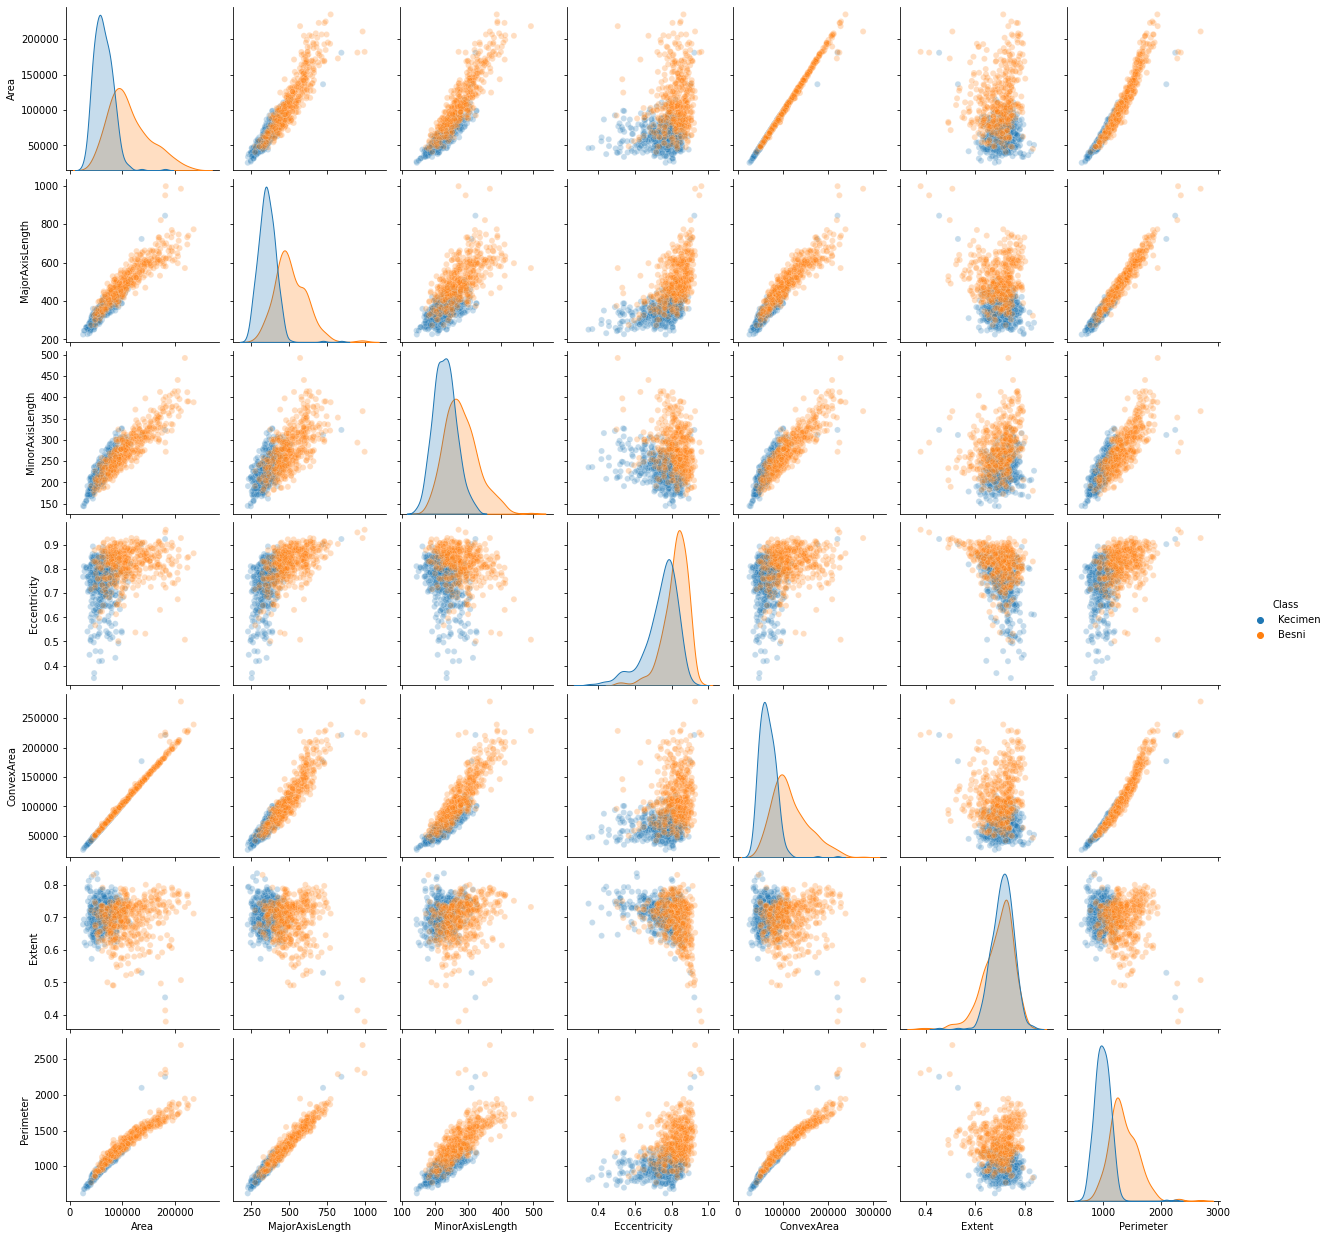

In [7]:
# pairwise scatterplot, representing Class by color
sns.pairplot(df, hue='Class',
             plot_kws = {'alpha' : 0.25})
plt.show()

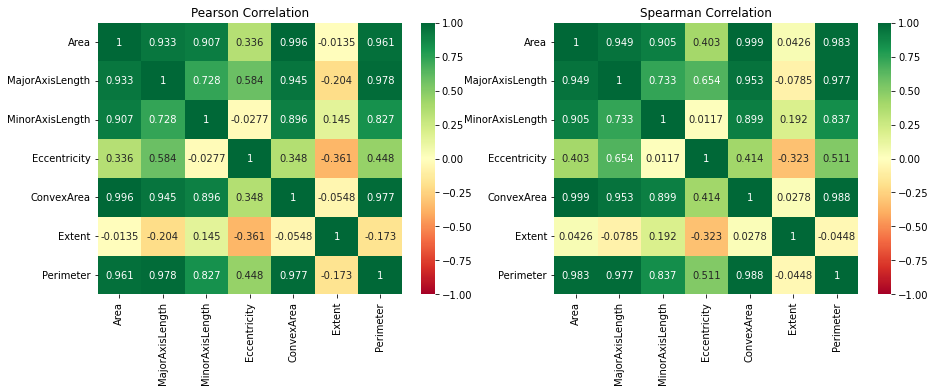

In [8]:
# calc and display correlations
corr_pearson = df[features_num].corr(method='pearson')
corr_spearman = df[features_num].corr(method='spearman')

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', 
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn',
            fmt='.3g', vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

<a id='features_by_class'></a>
# Feature Distributions by Class

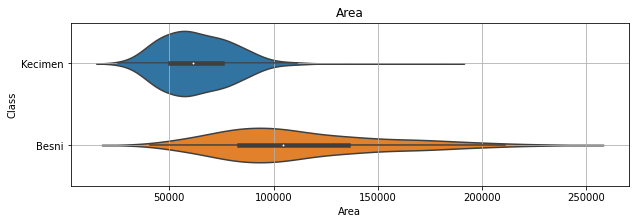

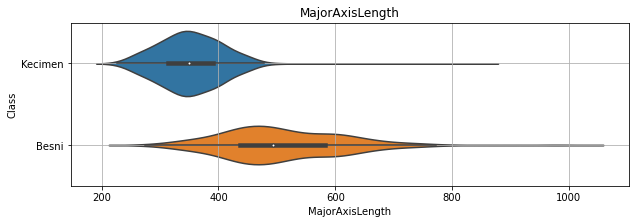

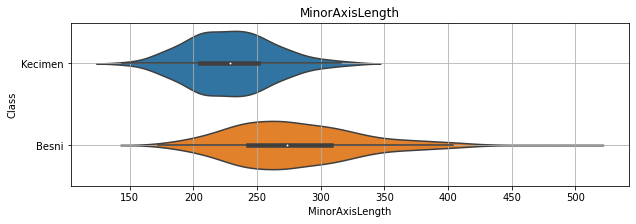

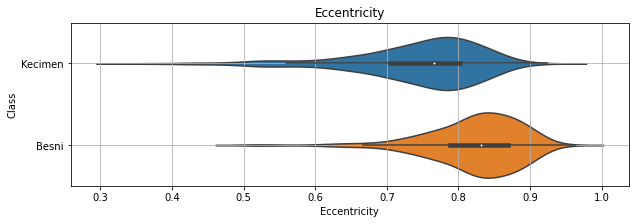

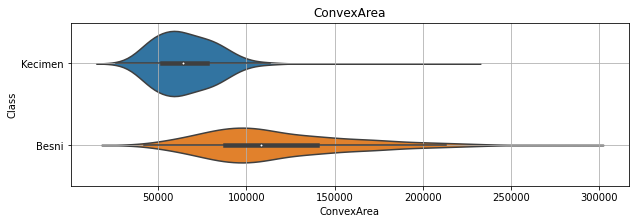

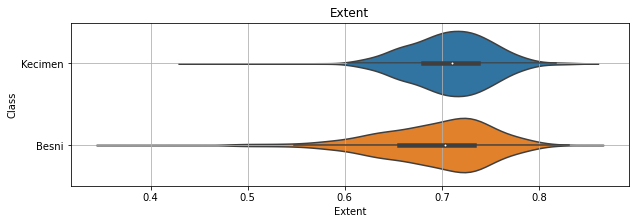

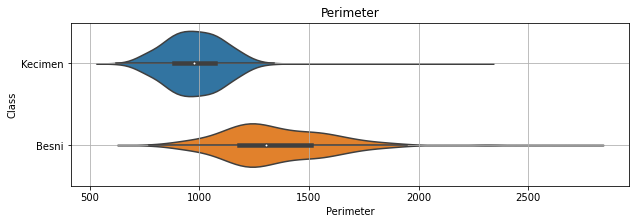

In [9]:
# plot distributions split by class for each feature
for f in features_num:
    plt.figure(figsize=(10,3))
    sns.violinplot(data=df, y='Class', x=f)
    plt.grid()
    plt.title(f)
    plt.show()

<a id='PCA'></a>
# Dimensionality Reduction - PCA

In [10]:
# standardize features
df4pca_std = StandardScaler().fit_transform(df[features_num])
# run PCA
pc_model = PCA(n_components=3)
pc = pc_model.fit_transform(df4pca_std)
# append PCA components to original data frame
df['pc_1'] = pc[:,0]
df['pc_2'] = pc[:,1]
df['pc_3'] = pc[:,2]

In [11]:
# interactive 3D plot - colored by class; size ~ area
fig = px.scatter_3d(df, x='pc_1', y='pc_2', z='pc_3',
                    color=df.Class.astype(str),
                    size=df.Area,
                    hover_data=features_num,
                    opacity=0.35)
fig.update_layout(title='Visualization using PCA dimension reduction')
fig.show()

<a id='RF'></a>
# Random Forest Model

In [12]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(df[features_num], df['Class'],
                                                    test_size=0.3, random_state=1234)

In [13]:
# define random forest model
clf = RandomForestClassifier(n_estimators=10,
                             max_depth=8,
                             random_state = 111)

In [14]:
# cross validation scores
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc')
scores

array([0.91502525, 0.87916667, 0.95530303, 0.93169744, 0.92259044])

In [15]:
print('CV AUC - mean: ', np.mean(scores))
print('CV AUC - stdev:', np.std(scores))

CV AUC - mean:  0.9207565664231488
CV AUC - stdev: 0.02481568775821346


In [16]:
# fit model
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=10, random_state=111)

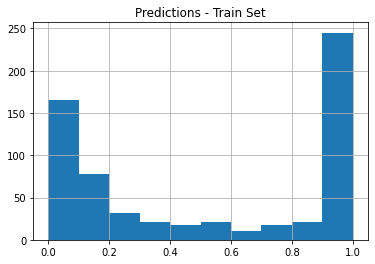

In [17]:
# predict on train set
y_train_pred = pd.DataFrame(clf.predict_proba(X_train), columns=['p0','p1'])
y_train_pred_p = y_train_pred.p0
# plot predictions (probabilities)
plt.hist(y_train_pred_p)
plt.title('Predictions - Train Set')
plt.grid()
plt.show()

In [18]:
# convert target to 0/1
y_train_01 = pd.factorize(y_train)
y_train_01 = y_train_01[0]

In [19]:
# ROC Curve and AUC
fpr, tpr, threshold = metrics.roc_curve(y_train_01, y_train_pred_p)
auc_train = metrics.auc(fpr,tpr)
print('AUC Train:', auc_train)

AUC Train: 0.9950169806743754


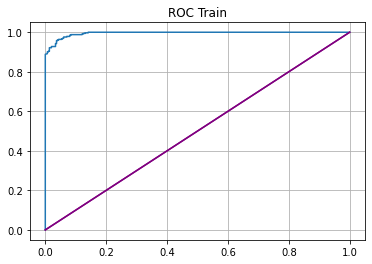

In [20]:
# plot ROC Curve
plt.plot(fpr, tpr)
plt.plot([(0,0),(1,1)], c='purple')
plt.title('ROC Train')
plt.grid()
plt.show()

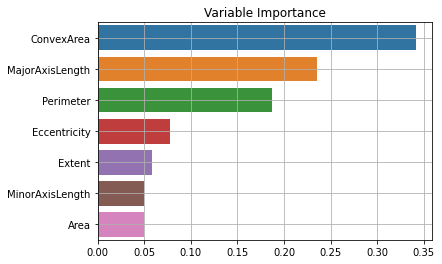

In [21]:
# get variable importance
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# plot variable importance
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Variable Importance')
plt.grid()
plt.show()

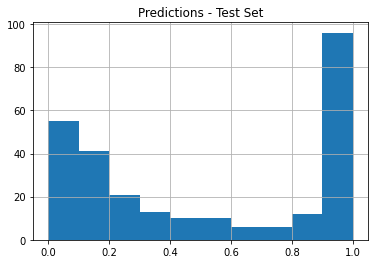

In [22]:
# predict on test set
y_test_pred = pd.DataFrame(clf.predict_proba(X_test), columns=['p0','p1'])
y_test_pred_p = y_test_pred.p0

# plot predictions (probabilities)
plt.hist(y_test_pred_p)
plt.title('Predictions - Test Set')
plt.grid()
plt.show()

In [23]:
# convert target to 0/1
y_test_01 = pd.factorize(y_test)
y_test_01 = y_test_01[0]

In [24]:
# ROC Curve and AUC
fpr, tpr, threshold = metrics.roc_curve(y_test_01, y_test_pred_p)
auc_test = metrics.auc(fpr,tpr)
print('AUC Test:', auc_test)

AUC Test: 0.9412355040142729


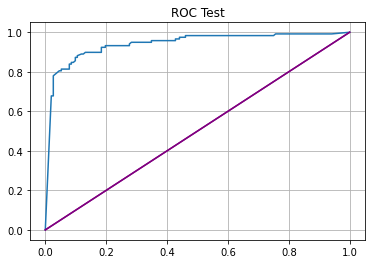

In [25]:
# plot ROC Curve
plt.plot(fpr, tpr)
plt.plot([(0,0),(1,1)], c='purple')
plt.title('ROC Test')
plt.grid()
plt.show()